### Business Understanding



I am aiming to determine the most impactful features of a car that drive its value in the used-car sales marketplace. More precisely, I am modeling car features data to predict accompanying sale price, and thereby providing a recommendation on which features impact business value the most.

### Data Understanding

In [1]:
# load the dataframe
import pandas as pd

df = pd.read_csv("data/vehicles.csv")
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [2]:
df["condition"].value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [3]:
# noting that price of zero makes absolutely no sense for a condition not "salvage"
df[(df["price"] == 0) & (df["condition"] != "salvage")]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
10,7218893038,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
11,7218325704,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,7217788283,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,7217147606,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,7209027818,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,7303347225,wyoming,0,2018.0,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426812,7302877815,wyoming,0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,JTKDE177460109655,fwd,NaN,NaN,silver,wy
426832,7302353283,wyoming,0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,JTDKB20U840108051,fwd,NaN,NaN,blue,wy
426836,7302301268,wyoming,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,wy


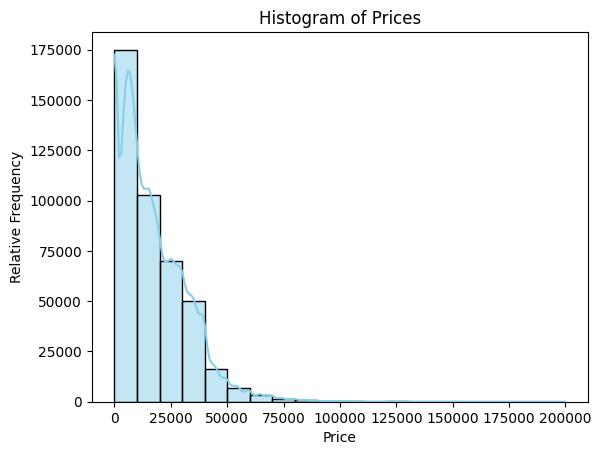

In [4]:
# there are definitely outliers in the 'price' and 'odemeter' columns, need to be removed eventually
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df[df["price"] < 200000]["price"], bins=20, kde=True, color="skyblue")
plt.xlabel("Price")
plt.ylabel("Relative Frequency")
plt.title("Histogram of Prices")
plt.show()

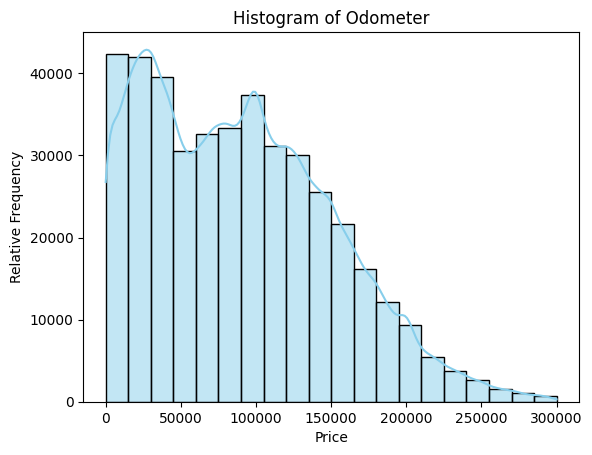

In [5]:
sns.histplot(
    df[df["odometer"] < 300000]["odometer"], bins=20, kde=True, color="skyblue"
)
plt.xlabel("Price")
plt.ylabel("Relative Frequency")
plt.title("Histogram of Odometer")
plt.show()

In [6]:
# exploring the initial data, seeing NANs
df.head(-5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426870,7301592119,wyoming,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,gas,3066.0,clean,other,5NPEG4JAXLH051710,fwd,NaN,sedan,blue,wy
426871,7301591639,wyoming,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,gas,34239.0,clean,other,KNDPMCAC7J7417329,NaN,NaN,SUV,NaN,wy
426872,7301591201,wyoming,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,gas,19059.0,clean,other,55SWF8DB6LU325050,rwd,NaN,sedan,white,wy
426873,7301591202,wyoming,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,gas,15080.0,clean,automatic,WDC0G4JB6JV019749,rwd,NaN,other,white,wy


In [7]:
# get a feel of non-Na data just for now
df.dropna().head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


In [8]:
# get a feel value possibilities for all object-typed (non numerical) variables
categorical_columns_for_plotting = []
value_counts = {
    col: df[col].value_counts() for col in df.select_dtypes(include=["object"])
}
for k, v in value_counts.items():
    if len(v) > 51:
        print(k, " feature has", len(v), "unique values")
    elif len(v) < 10:
        categorical_columns_for_plotting.append(k)

# model, region, VIN have more than 51 distinct values
df["model"].value_counts()

region  feature has 404 unique values
model  feature has 29649 unique values
VIN  feature has 118246 unique values


model
f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: count, Length: 29649, dtype: int64

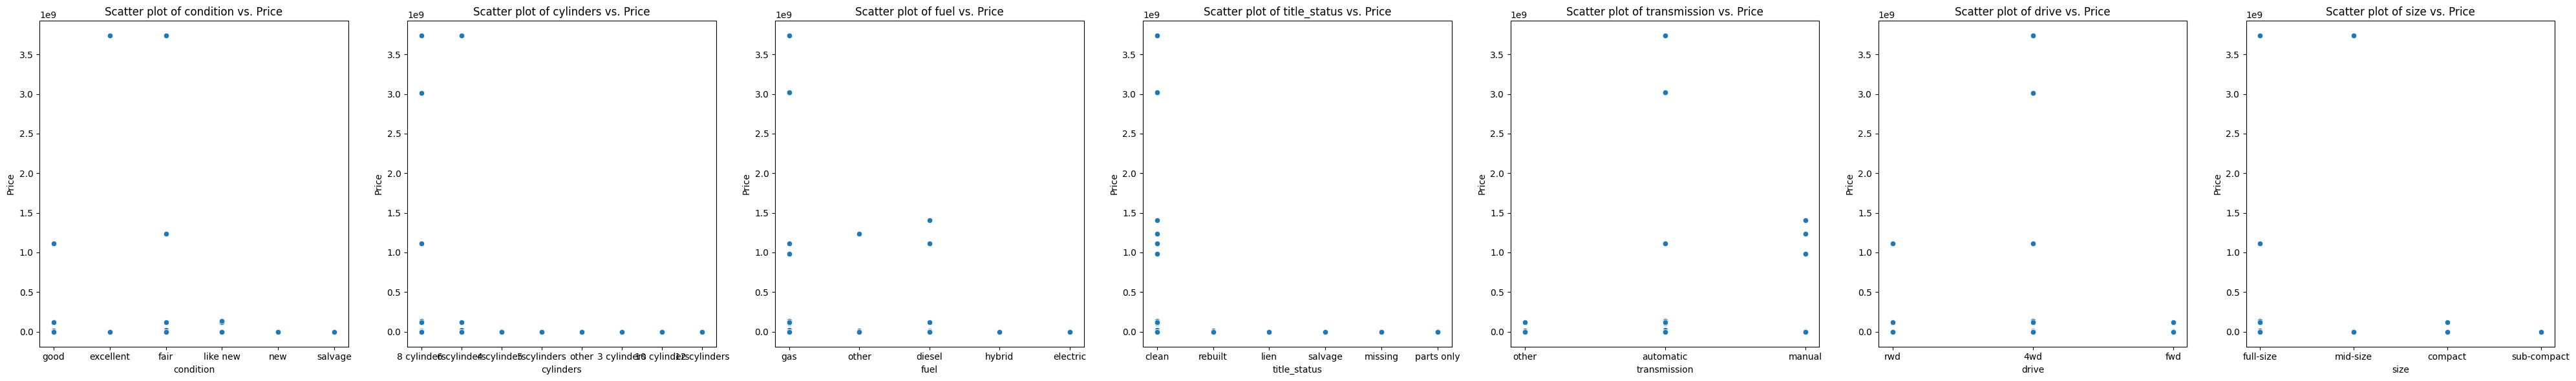

In [9]:
# categorial plots vs price to get a better feel
fig, axes = plt.subplots(1, len(categorical_columns_for_plotting), figsize=(40, 6))

for i, column in enumerate(categorical_columns_for_plotting):
    sns.scatterplot(data=df, x=column, y="price", ax=axes[i])
    axes[i].set_title(f"Scatter plot of {column} vs. Price")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Price")

plt.tight_layout()

plt.show()

In [10]:
# looking at numerical colummns ranges
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [11]:
# discover fully which features are null/ non-null, also seeing that there are numerical columns like "cylinders" takes on str values like "6 cylinders"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [12]:
# percentage of data for columns that is Null
df.isna().mean() * 100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

#### Data Understanding Summary/Discussion
From the loaded raw car data above, it is evident that it does not come clean and prepared. Some of the major observations are:
* several columns have >20% NaN values, price and odemeter have major outliers
* many of the columns are objects. Some of which actually contain numerical values (aka cylinders), while others are best off being ordinal or categorical
* some columns seem to have way to many unique values to be important and likely should be dropped initially (like VIN and model)

To cleanse the data, after dropping the initial columns based on a heuristic to be described, I will be performing transformations to encode features like ("fuel") to categorical values via one-hot encoding, and ordinal encoding ordered objects like "size" and "condition".
    
Based on the Data observations above, I am also inclined to explore different subsets of the data to find the best eventual overall model. These strategies are:
* use the subset of data with no NANs at all
* use all of the data including NANs combined with a version of imputation to handle NANs

With the different subsets of data described, I am inclined to explore feature selection and/or regularization to (from the get-go), get a feel for which features are important. This would play a role in me deciding which features to keep or drop in my exploration, before going into the eventual model building portion.

### Data Preparation

My heuristic to drop initial columns is if they have more than 50 (state) unique values in our dataset. This is true for the columns: id, VIN, model and region.

In [13]:
# initial pruning of data off the bat
initial_columns_to_drop = ["id", "VIN", "model", "region"]
df = df.drop(columns=initial_columns_to_drop).reset_index(drop=True)

# dropping outliers and decidedly bad data
df = df[
    df["price"] <= 200000
]  # anything above 200k should not be taken into account for the IQR
df = df[
    (df["price"] != 0) | (df["condition"] == "salvage")
]  # conditions not salvage shouldn't have price == 0


# remove outliers for price and odemeter
Q1_price = df["price"].quantile(0.25)
Q3_price = df["price"].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_odometer = df["odometer"].quantile(0.25)
Q3_odometer = df["odometer"].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = (
    Q3_price + 3 * IQR_price
)  # want more leeway on the upper bound for higher price cars

lower_bound_odometer = Q1_odometer - 1.5 * IQR_odometer
upper_bound_odometer = Q3_odometer + 1.5 * IQR_odometer

df = df[
    (df["price"] >= lower_bound_price)
    & (df["price"] <= upper_bound_price)
    & (df["odometer"] >= lower_bound_odometer)
    & (df["odometer"] <= upper_bound_odometer)
].reset_index(drop=True)

# include odemeter**2 as feature
df["odometer^2"] = df["odometer"] ** 2

df.describe()

,price,year,odometer,odometer^2
count,386828.000000,385746.00000,386828.000000,3.868280e+05
mean,18711.214336,2011.10012,90891.452715,1.198208e+10
std,14319.034560,9.50703,60998.634752,1.353365e+10
min,0.000000,1900.00000,0.000000,0.000000e+00
25%,7250.000000,2008.00000,37749.000000,1.424987e+09
50%,15471.500000,2013.00000,86100.000000,7.413210e+09
75%,27590.000000,2017.00000,134000.000000,1.795600e+10
max,89337.000000,2022.00000,281300.000000,7.912969e+10


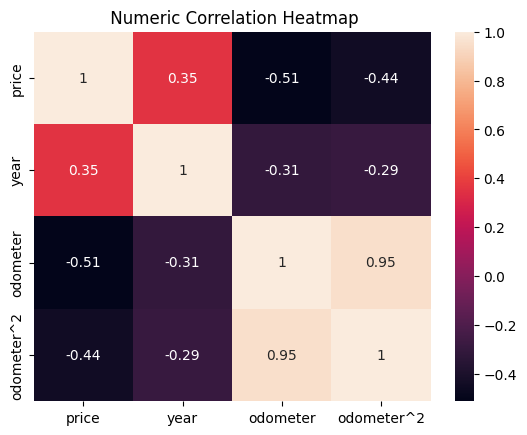

In [14]:
# discovering correlations with price for numeric features
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)
plt.title(" Numeric Correlation Heatmap")
plt.show()

In [15]:
# now as specified inthe data understanding stage, I will diverge final dataset strategies:
# one dataset (A) get rid of all NANs, and another to keep all NANs for later imputation
df_a = df.dropna().reset_index(
    drop=True
)  # df_a will be the one that had dropna() called - around 80k rows
df_a_y = df_a["price"]
df_a = df_a.drop(columns=["price"])

# dataset B will NOT dropna()
df_b = (
    df.copy()
)  # df_b will be the one without dropna() called, where imputation will be used
df_b_y = df_b["price"]
df_b = df_b.drop(columns=["price"])

In [16]:
# DF_A ordinal mapping and one-hot-encoding transformations
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df_a_categorical_columns = df_a.select_dtypes(include=["object"]).columns
df_a_numerical_columns = df_a.select_dtypes(exclude=["object"]).columns

# size and condition have inherent ordering
size_ordinal_mapping = {
    "sub-compact": 1,
    "compact": 2,
    "mid-size": 3,
    "full-size": 4,
}
condition_ordinal_mapping = {
    "salvage": 1,
    "fair": 2,
    "good": 3,
    "excellent": 4,
    "like new": 5,
    "new": 6,
}

df_a = df_a.copy()
df_a["size"] = df_a["size"].map(size_ordinal_mapping)
df_a["condition"] = df_a["condition"].map(condition_ordinal_mapping)

# one hot encoding on remaining categorical cols, for df_a now
categorical_columns_adjusted = [
    col for col in df_a_categorical_columns if col not in ["size", "condition"]
]

encoder = OneHotEncoder(sparse_output=False)
df_a_encoded = pd.DataFrame(
    encoder.fit_transform(df_a[categorical_columns_adjusted]),
    columns=encoder.get_feature_names_out(categorical_columns_adjusted),
)

# this is the prepped dataset for dataset A
df_a_ohe = pd.concat(
    [df_a.drop(columns=categorical_columns_adjusted), df_a_encoded], axis=1
)

In [17]:
# DF_B imputation and one-hot-encoding transformations
from sklearn.impute import SimpleImputer

df_b_categorical_columns = df_b.select_dtypes(include=["object"]).columns
df_b_numerical_columns = df_b.select_dtypes(exclude=["object"]).columns

# imputing numbers with the mean, and categories with unknown category
categorical_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
numerical_imputer = SimpleImputer(strategy="mean")

df_b[df_b_categorical_columns] = categorical_imputer.fit_transform(
    df_b[df_b_categorical_columns]
)
df_b[df_b_numerical_columns] = numerical_imputer.fit_transform(
    df_b[df_b_numerical_columns]
)

# no ordinal mapping used because of imputed "unknown" doesn't have a ranking
encoder = OneHotEncoder(sparse_output=False)
df_b_encoded = pd.DataFrame(
    encoder.fit_transform(df_b[df_b_categorical_columns]),
    columns=encoder.get_feature_names_out(df_b_categorical_columns),
)
df_b_ohe = pd.concat(
    [df_b.drop(columns=df_b_categorical_columns), df_b_encoded], axis=1
)

### Modeling

Step 1: Lasso regression for feature selection for both datasets A and B. Cross validation used extensively


In [18]:
# Lasso regression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


def LassoCV(X, y):
    alphas = [
        15.0,
        50.0,
        100.0,
        200.0,
        300.0,
        400.0,
    ]  # tried smaller values like [.01 ... 1.0] but those were not performant
    pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("lasso", Lasso()),
        ]
    )
    param_grid = {"lasso__alpha": alphas}
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X, y)

    best_alpha = grid_search.best_params_["lasso__alpha"]
    print("Best Alpha:", best_alpha)
    best_lasso_model = grid_search.best_estimator_.named_steps["lasso"]
    best_coefficients = best_lasso_model.coef_
    feature_coefficients = dict(zip(X.columns, best_coefficients))
    selected_features = [
        feature for feature, coef in feature_coefficients.items() if coef != 0
    ]
    print("Selected Features:", selected_features)

    return selected_features


df_a_features = LassoCV(df_a_ohe, df_a_y)
df_b_features = LassoCV(df_b_ohe, df_b_y)

Best Alpha: 50.0
Selected Features: ['year', 'condition', 'odometer', 'size', 'odometer^2', 'manufacturer_acura', 'manufacturer_alfa-romeo', 'manufacturer_aston-martin', 'manufacturer_bmw', 'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge', 'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_gmc', 'manufacturer_harley-davidson', 'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_jaguar', 'manufacturer_kia', 'manufacturer_lexus', 'manufacturer_lincoln', 'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi', 'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porsche', 'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn', 'manufacturer_subaru', 'manufacturer_tesla', 'manufacturer_toyota', 'manufacturer_volkswagen', 'cylinders_12 cylinders', 'cylinders_3 cylinders', 'cylinders_4 cylinders', 'cylinders_5 cylinders', 'cylinders_8 cylinders', 'fuel_diesel', 'fuel_gas', 'titl

Step 2:  Multiple Regressors on both datasets (A & B). For both training and testing datasets, assessing error with mean absolute error (the most descriptive for price diff in this scenario), alongside R2 score

In [137]:
# Pipeline 1 - With selected features for both datasets, I run simple LinearRegression and RandomForest regressors
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


def print_model_results(data_used, results):
    model_name, training_error, testing_error, r2_train, r2_test = results
    print(f"\tModel for data {data_used}: {model_name}")
    print("\t\t MAE Training:", f"${training_error}")
    print("\t\t MAE Testing:", f"${testing_error}")
    print("\t\t R2 Training Score:", f"{r2_train}")
    print("\t\t R2 Testing Score:", f"{r2_test}\n")


def pipeline_1(X, y, regressor):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    pipeline_1 = Pipeline([("regression", regressor)]).fit(X_train, y_train)

    train_predictions = pipeline_1.predict(X_train)
    test_predictions = pipeline_1.predict(X_test)

    training_error = mean_absolute_error(train_predictions, y_train)
    testing_error = mean_absolute_error(test_predictions, y_test)

    r2_train = r2_score(y_train, train_predictions) * 100
    r2_test = r2_score(y_test, test_predictions) * 100

    return "pipe 1", training_error, testing_error, r2_train, r2_test


regressors = [LinearRegression(), RandomForestRegressor()]

for regressor in regressors:
    print("Regressor: ", type(regressor))
    print_model_results(
        "\tdf_a data", pipeline_1(df_a_ohe[df_a_features], df_a_y, regressor)
    )
    print_model_results(
        "\tdf_b data", pipeline_1(df_b_ohe[df_b_features], df_b_y, regressor)
    )
    print_model_results(
        "\tsimplest(dummy) data",
        pipeline_1(df_a[["year", "odometer"]], df_a_y, regressor),
    )

Regressor:  <class 'sklearn.linear_model._base.LinearRegression'>
	Model for data 	df_a data: pipe 1 baseline
		 MAE Training: $5082.090835229872
		 MAE Testing: $5073.183511933349
		 R2 Training Score: 60.43560030459126
		 R2 Testing Score: 61.12259669094926

	Model for data 	df_b data: pipe 1 baseline
		 MAE Training: $6208.90145812894
		 MAE Testing: $6245.769493453139
		 R2 Training Score: 59.81336322337676
		 R2 Testing Score: 59.09806079615498

	Model for data 	simplest(dummy) data: pipe 1 baseline
		 MAE Training: $7596.88694360661
		 MAE Testing: $7629.607638873686
		 R2 Training Score: 22.900398049414516
		 R2 Testing Score: 22.889238904373666

Regressor:  <class 'sklearn.ensemble._forest.RandomForestRegressor'>
	Model for data 	df_a data: pipe 1 baseline
		 MAE Training: $900.9436558191794
		 MAE Testing: $2421.8590998830755
		 R2 Training Score: 97.96241633464984
		 R2 Testing Score: 84.9959706045054

	Model for data 	df_b data: pipe 1 baseline
		 MAE Training: $875.73533020

Step 3: Further modeling with Regression models using Sequential Feature Selection and GridCV(for best number of features to select). Note: The training for this took much longer and the results did not perform as well as the models from Step 2

In [138]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV


# training takes way too long for this and results are not better than the pipeline1
def pipeline_2(X, y, regressor):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    pipeline2 = Pipeline(
        [
            ("scaler", StandardScaler()),
            (
                "sfs",
                SequentialFeatureSelector(regressor),
            ),
            ("model", regressor),
        ]
    )

    param_grid = {"sfs__n_features_to_select": [5, 10, 15]}

    grid_search = GridSearchCV(
        pipeline2, param_grid, cv=5, scoring="neg_mean_squared_error"
    ).fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    selected_features = X_train.columns[best_model.named_steps["sfs"].get_support()]
    print("Best Model selected Features: ", selected_features)

    train_predictions = best_model.predict(X_train)
    test_predictions = best_model.predict(X_test)

    training_error = mean_absolute_error(train_predictions, y_train)
    testing_error = mean_absolute_error(test_predictions, y_test)

    r2_train = r2_score(y_train, train_predictions) * 100
    r2_test = r2_score(y_test, test_predictions) * 100

    return "pipe 2", training_error, testing_error, r2_train, r2_test


regressors = [LinearRegression()]

for regressor in regressors:
    print("Regressor: ", type(regressor))
    print_model_results(
        "\tdf_a data", pipeline_2(df_a_ohe[df_a_features], df_a_y, regressor)
    )
    print_model_results(
        "\tdf_b data", pipeline_2(df_b_ohe[df_b_features], df_b_y, regressor)
    )

Regressor:  <class 'sklearn.linear_model._base.LinearRegression'>
Best Model selected Features:  Index(['year', 'odometer', 'cylinders_8 cylinders', 'fuel_diesel',
       'drive_fwd'],
      dtype='object')
	Model for data 	df_a data: pipe 2
		 MAE Training: $5875.376824209147
		 MAE Testing: $5832.478574260232
		 R2 Training Score: 49.51541693949905
		 R2 Testing Score: 50.8923601417666

Best Model selected Features:  Index(['year', 'odometer', 'cylinders_4 cylinders', 'fuel_diesel',
       'drive_4wd'],
      dtype='object')
	Model for data 	df_b data: pipe 2
		 MAE Training: $7354.641583163234
		 MAE Testing: $7332.112120172596
		 R2 Training Score: 48.98198712064775
		 R2 Testing Score: 48.65751050832182



### Evaluation

##### Metrics
Throughout the modeling phase, the evaluation metric that I used to compare them were the MAE (mean absolute error) and R2 (score). 

Though many regressors optimize on MSE, I reported MAE since in the context of this problem, it denotes the average price difference between my model's prediction and the actual value. 

I also included the R2 score since it gauges model's accuracy and effectiveness in explaining the relationship between variables. Higher R-squared values typically indicate a better fit, meaning the model is more effective at predicting or explaining the variance in the dependent variable.


##### The Best Model
As previously mentioned, I was inclined to use two different dataset bases, one without NANs(dropped), and one with NANs (to later be imputed). After initially narrowing down the feature space with Lasso Regression(alpha optimized via GridSearchCV), the "best" model was a RandomForestRegression model trained on the imputed dataset(dataset B). 

This best model achieved a **MAE of $2326.07** and **R2 score of 88.12** for the holdout testing dataset. 

To interpret this result, this model is expected to predict a price within $2326 of the true price. 

##### Feature Importance on Best Model

Below displays the top 15 feature importances on my "best" model (in decreasing order). Note that since I used DataSet B, imputed values of "unknown" were replacements for original NANs, and one_hot encoded feature categories are denoted with __ right before the subcategory value.


![Top 15 Features](top_15_features.png)

### Deployment

Client-facing Report in README.md file